In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../output/stage2/exp005.py/20230923195407_new_data_all300val_maxlen256/valid_predictions.csv")

In [3]:
df_retrieval = pd.read_parquet("../output/context_pipeline/stage1/exp009.py/20230922162941_gte-base_wikiall_without_sep_targetprompt_and_choice_without_sep_token_length120_stride_sentence4_drop_categoryTrue_all/valid.parquet")

In [4]:
df = pd.merge(df, df_retrieval)

In [5]:
df[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]].values

array([[-1.3369141 ,  1.046875  ,  8.6640625 , -2.1699219 ,  1.1875    ],
       [-6.9570312 , -7.453125  ,  4.7695312 , -7.7460938 , -7.3632812 ],
       [-2.6933594 , -7.7265625 , -8.046875  , -1.4091797 , -6.515625  ],
       ...,
       [ 1.5742188 , -1.5712891 , -1.1513672 , -2.8789062 , -7.6289062 ],
       [-2.3066406 , -0.71484375, -2.4921875 , -1.546875  , -5.4648438 ],
       [-6.3164062 ,  1.1972656 , -3.3710938 ,  4.2773438 , -9.0859375 ]])

In [21]:
df[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]].values.argsort(axis=1)

array([[3, 0, 1, 4, 2],
       [3, 1, 4, 0, 2],
       [2, 1, 4, 0, 3],
       ...,
       [4, 3, 1, 2, 0],
       [4, 2, 0, 3, 1],
       [4, 0, 2, 1, 3]])

In [22]:
for i in range(5):
    df[f"pred_{i+1}"] = df[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]].values.argsort(axis=1)[:, -i-1]
    df[f"pred_{i+1}"] = df[f"pred_{i+1}"].map({
        0: "A", 1: "B", 2: "C", 3: "D", 4: "E"
    })

In [23]:
# df["pred_1"] = df[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]].values.argmax(axis=1)
# df["pred_1"] = df["pred_1"].map({
#     0: "A", 1: "B", 2: "C", 3: "D", 4: "E"
# })

In [24]:
df["correct"] = df["answer"] == df["pred_1"]

In [29]:
def correct_idx(series):
    for i in [1, 2, 3, 4, 5]:
        if series["answer"] == series[f"pred_{i}"]:
            return i
df["correct_idx"] = df.apply(correct_idx, axis=1)

In [38]:
df["score"] = df["correct_idx"].map({1: 1, 2: 1/2, 3: 1/3, 4: 0, 5: 0})

In [42]:
df.groupby("source")["score"].describe().to_csv("aaaa.csv")

In [31]:
import matplotlib.pyplot as plt

In [25]:
df["max"] = df[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]].max(axis=1)

correct_idx
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
Name: max, dtype: object

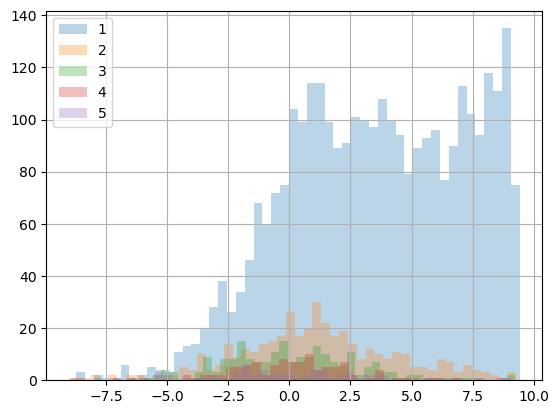

In [37]:
df.groupby("correct_idx")["max"].hist(alpha=0.3, legend=True, bins=50)

In [41]:
df.groupby("source")["max"].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
1,300.0,3.028742,4.085049,-8.023438,-0.072311,3.082031,6.636719,9.257812
11,300.0,5.406184,3.265555,-5.175781,2.956055,6.240234,8.142578,9.367188
2,300.0,3.242805,4.202982,-7.160156,-0.045559,3.424805,7.251953,9.335938
3,307.0,2.436299,3.635648,-7.113281,-0.414429,1.958008,5.208984,9.257812
4,300.0,3.604144,3.909909,-7.535156,0.520142,3.877930,7.134766,9.398438
5,307.0,2.479251,3.630635,-5.804688,-0.156036,2.251953,5.468750,9.265625
6,300.0,4.745774,3.684384,-8.875000,1.678467,5.441406,7.866211,9.437500
7,300.0,3.135436,3.461291,-8.742188,0.597778,3.052734,5.935547,9.226562
8,300.0,3.591015,3.557039,-5.375000,0.954346,3.697266,6.782227,9.367188


In [34]:
df["correct"].value_counts()

False    3177
True      737
Name: correct, dtype: int64

In [17]:
df_wrong = df[~df["correct"]]
for source, df_wrong_ in df_wrong.groupby("source"):
    for i in range(5):
        series = df_wrong_.iloc[i]
        print("\n\n=================================")
        print(f"wrong {i}: {series.name}, source={series.source}")
        print("=================================")

        print("prompt:")
        print(series["prompt"])
        for option in "ABCDE":
            print(f"{option}: {series[option]}")

        print("\n-----------------------------------")
        for j in range(5):
            print(f"** retrieval {j}: {series['searched_ids'][j]} **")
            print(series[f"searched_wiki_id_{j}"])
        print("\n-----------------------------------")        
        print(f"answer: {series['answer']}")
        print(f"prediction:")
        display(pd.DataFrame([series])[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]])



wrong 0: 5, source=1
prompt:
Who is Flutura Ibrahimi, also known as Uta Ibrahimi?
A: A famous Italian opera singer known for her soprano voice.
B: A popular Albanian actress who has starred in several international films.
C: A renowned Albanian fashion designer who has showcased her collections in Paris and Milan.
D: A Kosovar politician who served as the Minister of Foreign Affairs from 2014 to 2017.
E: A prominent Albanian alpinist from Kosovo.

-----------------------------------
** retrieval 0: 30308268 **
#List of people from Shkodër
 Elhaida Dani, The Voice of Italy winner and Albanian Eurovision representative Simon Gjoni, Composer Karl Gurakuqi, Linguist and folklorist. Luigj Gurakuqi, One of the leaders of the Albanian national movement. Elis Guri, former world champion Greco-Roman wrestler Anton Harapi, franciscan friar Kolë Idromeno, painter and photographer Prenkë Jakova, author of the first Albanian opera. Zef Jubani, folklorist and activist of the Albanian National Awak

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
5,-6.097656,-3.996094,-0.835938,0.68457,-0.564941




wrong 1: 10, source=1
prompt:
Which of the following statements accurately describes the habitat range of the Clambus armadillo beetle species?
A: Clambus armadillo beetles are found exclusively in Europe and Northern Asia.
B: Clambus armadillo beetles are not found in Europe, Northern Asia, and North America.
C: Clambus armadillo beetles are found exclusively in Northern Asia and North America.
D: Clambus armadillo beetles are found exclusively in Europe, Northern Asia, and North America.
E: Clambus armadillo beetles are found exclusively in Europe.

-----------------------------------
** retrieval 0: 57291877 **
#Clambus armadillo
Clambus armadillo is a species of minute beetle in the family Clambidae. It is found in Europe and Northern Asia (excluding China) and North America. "Clambus armadillo Report". Integrated Taxonomic Information System. Retrieved 2019-09-24. "Clambus armadillo". GBIF. Retrieved 2019-09-24. "Clambus armadillo species Information". BugGuide.net. Retrieved 20

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
10,-1.620117,-6.527344,-4.484375,-1.283203,-5.335938




wrong 2: 19, source=1
prompt:
What is the primary accomplishment or recognition of Alice Falaiye, the Canadian long jumper?
A: Alice Falaiye holds the current world record for the longest long jump in history.
B: Alice Falaiye revolutionized the technique of long jumping with her unique approach.
C: Alice Falaiye won multiple gold medals in long jump at the World Championships.
D: Alice Falaiye represented Canada in the Olympic Games multiple times.
E: Alice Falaiye achieved international acclaim for her contributions to the field of sports science.

-----------------------------------
** retrieval 0: 18889082 **
#Alice Falaiye
Alice Falaiye (born 24 December 1978) is a Canadian long jumper. She has won gold medals at the 2003 Pan American Games and the 2010 Commonwealth Games. She also competed at the 2001 World Championships without reaching the final. Falaiye never appeared in the Olympics. Her personal best jump is 6.72 metres, achieved in June 2009 in Baton Rouge. Canadian Falai

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
19,-8.054688,-8.875,-8.023438,-8.6875,-9.5




wrong 3: 20, source=1
prompt:
What is the origin of the word "pile" as used in the context of fabrics?
A: The word "pile" originates from the French word piler, meaning "to press" or "to compact".
B: The word "pile" comes from the Latin word pilus, which means "loop" or "strand".
C: The word "pile" has its roots in the Greek word pilos, signifying "a felted fabric".
D: The word "pile" is derived from the Arabic word pila, which translates to "soft texture".
E: The word "pile" originated from the German word pilen, which signifies "to weave tightly".

-----------------------------------
** retrieval 0: 2430583 **
#Pile
Look up pile in Wiktionary, the free dictionary. Pile or Piles may refer to: Pile, a type of deep foundation Screw piles, used for building deep foundations Pile bridge, structure that uses foundations consisting of long poles Pile lighthouse, a type of skeletal lighthouse, used primarily in Florida, US, and in Australia Screw-pile lighthouse, a lighthouse that stands o

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
20,5.738281,4.988281,4.253906,-0.508301,4.132812




wrong 4: 21, source=1
prompt:
What is the distinguishing feature of Mesopropithecus among sloth lemurs?
A: Its skull is similar to that of living sifakas.
B: It has longer hindlimbs than forelimbs.
C: It is more quadrupedal and uses suspension less than other sloth lemurs.
D: It has the shortest forelimbs among all sloth lemurs.
E: It is able to use both hindlimbs and forelimbs for suspension.

-----------------------------------
** retrieval 0: 26321288 **
#Mesopropithecus
 While the skull of Mesopropithecus most closely resembles that of modern sifakas, the postcranial skeleton is quite different. Rather than having elongated hindlimbs for leaping, Mesopropithecus had elongated forelimbs, suggesting they predominantly used quadrupedal locomotion, slow climbing, with some forelimb and hindlimb suspension. In fact, they were the most quadrupedal of the sloth lemurs, having an intermembral index between 97 and 113, compared to the lower value for indriids and higher values for the oth

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
21,-0.559082,-6.511719,0.602539,-5.664062,-2.542969




wrong 0: 2722, source=11
prompt:
What is added to a measured portion of a more concentrated stock solution to achieve a particular concentration?
A: pigment
B: solvent
C: yeast
D: Coralliophilla Monodonta is a species of sea snail, a marine gastropod mollusk in the family Terebridae, the auger snails.
E: water

-----------------------------------
** retrieval 0: 44731 **
#Calcium carbonate
 In the case of a strong monoacid with decreasing acid concentration [A] = [A−], we obtain (with CaCO3 molar mass = 100g/mol): where the initial state is the acid solution with no Ca2+ (not taking into account possible CO2 dissolution) and the final state is the solution with saturated Ca2+. For strong acid concentrations, all species have a negligible concentration in the final state with respect to Ca2+ and A− so that the neutrality equation reduces approximately to 2[Ca2+] = [A−] yielding [Ca2+] ≈ 0.5 [A−]. When the concentration decreases, [HCO−3] becomes non-negligible so that the preceding ex

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2722,-3.003906,-2.476562,-5.015625,-7.992188,-1.587891




wrong 1: 2767, source=11
prompt:
By exploding what the space probes get separated from their launchers?
A: frames
B: The pointed cap with a tassel is used as a protective gear during the hobby horse performances to shield the rider's head.
C: doors
D: bolts
E: walls

-----------------------------------
** retrieval 0: 2317721 **
#Cap gun
 Ring caps were placed in a "backpack" integrated into the figure, which contained the striking mechanism for the caps (as well as tiny vents to allow smoke from a triggered cap to escape). This mechanism was triggered by drawing the figure's spring-loaded right arm back and releasing it to swing forward; the explosion of the cap was intended to simulate a thunderous noise caused by the superhuman power of the character's punch. Similar cap firing mechanisms for toy soldiers were produced in Germany for the Elastolin and Lineol toy soldiers and artillery pieces. Another example is a relatively new type of Airsoft, called Hybrid Guns Hybrid guns use s

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2767,-5.175781,-9.242188,-9.023438,-5.53125,-9.273438




wrong 2: 2772, source=11
prompt:
The speed of a wave through connected harmonic oscillators depends on the distance between them, the spring constant, and the what?
A: mass
B: concentrations
C: temperature
D: density
E: compacted collagen

-----------------------------------
** retrieval 0: 33516 **
#Wave
 The speed of a transverse wave traveling along a vibrating string (v) is directly proportional to the square root of the tension of the string (T) over the linear mass density (μ): v = T μ , {\displaystyle v={\sqrt {\frac {T}{\mu }}},} where the linear density μ is the mass per unit length of the string. Acoustic or sound waves are compression waves which travel as body waves at the speed given by: v = B ρ 0 , {\displaystyle v={\sqrt {\frac {B}{\rho _{0}}}},} or the square root of the adiabatic bulk modulus divided by the ambient density of the medium (see speed of sound). Ripples on the surface of a pond are actually a combination of transverse and longitudinal waves; therefore, t

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2772,-3.310547,-7.265625,-3.183594,-1.775391,-6.371094




wrong 3: 2778, source=11
prompt:
Vertebrate animals have two major body cavities, the dorsal and what is the other?
A: proximal cavity
B: functional cavity
C: spinal cavity
D: anterior cavity
E: Pomeranchuk cooling is the phenomenon in which liquid helium-3 will heat up if it is expanded isentropically when it is above 0.3K, as observed by Yuri Anufriev in 1965. 

-----------------------------------
** retrieval 0: 18932382 **
#Pomeranchuk cooling
Pomeranchuk cooling (named after Isaak Pomeranchuk) is the phenomenon in which liquid helium-3 will cool if it is compressed isentropically when it is below 0.3 K. This occurs because helium-3 has the unusual property that its solid state can have a higher entropy than its liquid state. The effect was first observed by Yuri Anufriev in 1965. This can be used to construct a cryogenic cooler. In 2021 an analog effect has been observed on twisted bilayer graphene and in TMDs Lee, David M. (1 July 1997). "The extraordinary phases of liquid ${}^

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2778,-1.296875,-4.324219,-2.869141,-1.072266,-8.664062




wrong 4: 2793, source=11
prompt:
When sediments settle out of water, what do they form?
A: separated layers
B: erosion
C: The prisoner bribed a fellow passenger to help him distract the guards and create an opportunity for escape.
D: horizontal layers
E: magnetic layers

-----------------------------------
** retrieval 0: 2514003 **
#Sediment–water interface
In oceanography and limnology, the sediment–water interface is the boundary between bed sediment and the overlying water column. The term usually refers to a thin layer (approximately 1cm deep, though variable) of water at the very surface of sediments on the seafloor. In the ocean, estuaries, and lakes, this layer interacts with the water above it through physical flow and chemical reactions mediated by the micro-organisms, animals, and plants living at the bottom of the water body. The topography of this interface is often dynamic, as it is affected by physical processes (e.g. currents causing rippling or resuspension) and biol

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2793,2.009766,-7.730469,-9.414062,1.868164,-3.105469




wrong 0: 302, source=2
prompt:
What is the significance of US Route 34 in the state of Colorado?
A: It connects the city of Granby to Berwyn, Illinois, crossing multiple states.
B: It marks the Colorado-Nebraska border and continues as US 34, east of Laird.
C: It is a 260-mile-long road that extends from Granby to the Nebraska border.
D: It runs through the northern region of Colorado, connecting various cities and towns.
E: It forms a part of the U.S. Highway System that spans across the entire United States.

-----------------------------------
** retrieval 0: 21743609 **
#U.S. Route 34 in Colorado
U.S. Route34 (US34) is a part of the U.S. Highway System that travels from Granby, Colorado, to Berwyn, Illinois. In the U.S. state of Colorado, US34 is a 260-mile-long (420km) road that spans across northern Colorado. It begins at US 40 in Granby and ends at the Nebraska border, where it continues as US34, east of Laird. The route begins in Granby at US 40. It then follows the Colorado 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
302,-2.691406,-1.56543,3.326172,-1.610352,-5.492188




wrong 1: 303, source=2
prompt:
In the DC Comics universe, which character assumed the mantle of the supervillain Eclipso after experiencing a mental breakdown and being responsible for the deaths of Sue Dibny and Jack Drake?
A: Gil Kane
B: Atom
C: Jean Loring
D: Elongated Man
E: Gardner Fox

-----------------------------------
** retrieval 0: 1518808 **
#Eclipso
Eclipso (/ɪˈklɪpsoʊ/) is a supervillain in the DC Comics Universe. The character is the incarnation of the Wrath of God and the Angel of Vengeance that turned evil and was replaced by the Spectre. The character bears notable similarities to Dr. Jekyll and Mr. Hyde. Eclipso appeared as the main antagonist of the second season of The CW television show Stargirl, portrayed as an adult by Nick E. Tarabay and Jason Davis and as a young boy by Milo Stein. Eclipso first appeared in House of Secrets #61 (August 1963) and was created by Bob Haney and Lee Elias. Originally, Eclipso was written as a generic villain with average superpow

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
303,-0.915527,-5.140625,0.023193,-0.833984,0.887695




wrong 2: 305, source=2
prompt:
What is the main focus of the Universidade Lusíada de Angola, commonly known as U.L.A.?
A: The Universidade Lusíada de Angola is an organization that promotes cultural events and activities in Angola.
B: The Universidade Lusíada de Angola is an educational institution offering a wide range of degree programs.
C: The Universidade Lusíada de Angola is a professional soccer team playing in the Angolan premier league.
D: The Universidade Lusíada de Angola is a humanitarian organization providing aid and support to communities in need.
E: The Universidade Lusíada de Angola is a semi-professional basketball team named after its sponsor.

-----------------------------------
** retrieval 0: 41299360 **
#Universidade Lusíada de Angola
The Universidade Lusíada de Angola, also known as U.L.A. was an Angolan semi-professional basketball team which is named after its major sponsor, the Angolan Lusíadas University. The men's team made its debut at the Angolan premier

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
305,-8.75,-5.941406,-8.734375,-8.296875,0.080444




wrong 3: 312, source=2
prompt:
Which of the following media outlets have featured documentary films produced by Northland Films Inc.?
A: The New York Times and Variety magazine.
B: The Wall Street Journal and CNBC.
C: The Chicago Tribune and BBC News.
D: The Miami Herald and CBS News.
E: The Washington Post and ABC News.

-----------------------------------
** retrieval 0: 59874060 **
#Journalism in American film and television
 Call Northside 777 (1948, Twentieth Century Fox Film Corporation, 111 minutes) Newspaper reporter P.J. McNeal (James Stewart) for the Chicago Times investigates & attempts to prove that a man jailed for murder was wrongly convicted 11 years earlier. 1950s Ace in the Hole (1951, Paramount, 112 minutes) This film touches on the ethical aspects of journalism Kirk Douglas stars as a disgraced reporter working for an Albuquerque newspaper and who is in search of a pressing news sensation. He exploits a story about a man trapped in a cave to revitalize his career, 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
312,-2.09375,-1.806641,-2.207031,-1.131836,-1.136719




wrong 4: 329, source=2
prompt:
What is the geological composition of Piz Foraz in the canton of Graubünden?
A: Piz Foraz is primarily composed of dolomite and gneiss.
B: Piz Foraz is primarily composed of granite and limestone.
C: Piz Foraz is primarily composed of quartz and marble.
D: Piz Foraz is primarily composed of shale and sandstone.
E: Piz Foraz is primarily composed of basalt and obsidian.

-----------------------------------
** retrieval 0: 37689184 **
#Piz Grialetsch
Piz Grialetsch is a mountain of the Albula Alps, Switzerland, overlooking the Fuorcla da Grialetsch in the canton of Graubünden. It lies on the range between the Dischma and Engadin valleys, which culminates at Piz Vadret. Retrieved from the Swisstopo topographic maps. The key col is the Fuorcla Vallorgia (2,967 m). Piz Grialetsch on Hikr v t .
** retrieval 1: 2459259 **
#Greisen
 Greisens are usually variably altered rocks, grading from coarse, crystalline granite, commonly vuggy with miarolitic cavities, th

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
329,-2.365234,-6.566406,-5.558594,-5.0,-7.699219




wrong 0: 608, source=3
prompt:
What is the organization that Tenzin Choegyal financially supports through his tours, which provides education to Tibetan refugee children?
A: Tibetan Refugee Support Network
B: Tibetan Children's Villages
C: Tibetan Monastery Society
D: Himalayan Cultural Center
E: Tibetan Education Foundation

-----------------------------------
** retrieval 0: 31681572 **
#Tenzin Tethong
 The Dalai Lama Foundation also works to develop close relations with other organizations that are engaged in the Dalai Lama's work for peace in the world, and collaborates with a number of organizations bearing the Dalai Lama's name; The Foundation for Universal Responsibility of the Dalai Lama in New Delhi, The Dalai Lama Center for Peace Education in Vancouver, Canada, and The Dalai Lama Center for Ethics at the Massachusetts Institute of Technology in Boston. Currently, Tenzin Tethong, a Distinguished Fellow at the Tibetan Studies Initiative, Stanford University (a program he pla

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
608,-0.787109,-0.76416,-2.792969,-0.327637,-0.65918




wrong 1: 616, source=3
prompt:
What is the nature of the relationship between Howie and Willow in "The Wicker Man"?
A: Willow and Howie maintain a close friendship throughout the narrative.
B: Howie and Willow share a romantic relationship by the end of the story.
C: Willow convinces Howie to join her in a secret cult.
D: Howie falls in love with Willow and they elope together.
E: Howie develops feelings for Willow, but ultimately rejects her advances.

-----------------------------------
** retrieval 0: 37727 **
#Willow Rosenberg
 In Season Eight, Kennedy and Willow are still romantically involved, but separated during Willow's self-exploration. Unlike her relationship with Tara, Willow is able to hold a separate identity while with Kennedy. When she realizes her powers have gone at the end of Season Eight, however, Willow ends her relationship with Kennedy, saying that there is someone else Willow is in love with, who she will never see again. Kennedy's role split many Buffy fans i

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
616,-6.832031,-3.767578,-5.363281,-3.916016,-3.929688




wrong 2: 617, source=3
prompt:
When did services west of Bathgate commence?
A: Sundays
B: Sunday 17 October 2010
C: 12 December 2010
D: 12 December 2010
E: Monday to Saturdays

-----------------------------------
** retrieval 0: 18513517 **
#Bathgate railway station
 The station opened on 18 October 2010, replacing the 1986 station, which closed at the end of the day's service on 16 October 2010. Rail replacement bus services were provided between Bathgate and Haymarket on Sunday 17 October 2010. Services west of Bathgate commenced on 12 December 2010, with the route being incorporated into the North Clyde Line services. At the time of opening in 2010, there was a half-hourly service from Bathgate to Edinburgh Monday to Saturdays with an hourly service on Sundays As a result of delays with commissioning of the Class 380 trains, insufficient Class 334 trains for the full service were available for the introduction of the intended timetable from 12 December 2010. Due to inclement weath

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
617,-8.578125,-5.171875,7.496094,7.496094,-6.195312




wrong 3: 618, source=3
prompt:
In the Olympic gymnastics qualifications, what event did Madison Kocian compete in the all-around but did not make it into the final?
A: Madison Kocian competed in the vault event and missed out on the final.
B: Madison Kocian competed in the floor exercise event and missed out on the final.
C: Madison Kocian competed in the all-around final.
D: Madison Kocian competed in the balance beam event and missed out on the final.
E: Madison Kocian competed in the uneven bars event and missed out on the final.

-----------------------------------
** retrieval 0: 40514396 **
#Madison Kocian
S. team for the 2016 Olympics alongside Biles, Douglas, Raisman, and Laurie Hernandez. 2016 Rio de Janeiro Olympics On August 7, Kocian competed in the women's qualification round at the 2016 Summer Olympics. After showing all events in podium training, she competed only on the uneven bars, scoring a 15833. Her score was the highest on that event and qualified her in first pl

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
618,-3.824219,-3.441406,-5.734375,-4.378906,-3.777344




wrong 4: 621, source=3
prompt:
What was the outcome after Leah Gibson withdrew from university and moved to Vancouver in pursuit of a career in film acting?
A: Gibson struggled to find acting opportunities in Vancouver and eventually gave up on pursuing a career in film.
B: Gibson joined a theater company in Vancouver and received critical acclaim for her performances on stage.
C: Gibson found immediate success and landed a leading role in a major film. This decision proved to be a turning point in her career.
D: Gibson decided to continue her studies in psychology and returned to university to complete her degree.
E: Gibson faced numerous challenges in Vancouver but persevered and eventually achieved recognition for her acting talents.

-----------------------------------
** retrieval 0: 36725264 **
#Leah Gibson
 In early years of dancing and singing, she discovered musical theatre. She transferred to a high school that specialized in fine arts, maintaining honor-roll grades and gra

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
621,-2.861328,-6.53125,-5.214844,-4.761719,-0.360107




wrong 0: 931, source=4
prompt:
What is the ideology of the Democratic Centre of Macau?
A: The Democratic Centre of Macau advocates for social democracy and progressive policies to address economic inequality.
B: The Democratic Centre of Macau follows a centrist approach and aims to strike a balance between different political ideologies.
C: The Democratic Centre of Macau supports a nationalist platform and focuses on protecting the cultural identity of Macau.
D: The Democratic Centre of Macau promotes a liberal approach to economic policies and emphasizes free-market principles.
E: The Democratic Centre of Macau promotes a conservative political agenda focused on traditional values and limited government intervention.

-----------------------------------
** retrieval 0: 71172268 **
#Democratic Centre of Macau
Democratic Centre of Macau (Portuguese: Centro Democrático de Macau; Chinese: 澳門民主協會; CDM) is a centre-left progressive Portuguese political association based in Macau, then a P

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
931,-2.443359,-4.644531,-8.078125,-9.078125,-8.984375




wrong 1: 933, source=4
prompt:
What is the term used to describe the shape formed by elongating a pentagonal orthocupolarotunda by inserting a decagonal prism between its halves?
A: The elongated pentagonal orthocupolarotunda
B: The pentagonal decagonal prism
C: The elongated pentagonal gyrocupolarotunda
D: The pentagonal orthocupolarotunda prism
E: The decagonal orthocupolarotunda

-----------------------------------
** retrieval 0: 1200006 **
#Elongated pentagonal orthocupolarotunda
In geometry, the elongated pentagonal orthocupolarotunda is one of the Johnson solids (J40). As the name suggests, it can be constructed by elongating a pentagonal orthocupolarotunda (J32) by inserting a decagonal prism between its halves. Rotating either the cupola or the rotunda through 36 degrees before inserting the prism yields an elongated pentagonal gyrocupolarotunda (J41). A Johnson solid is one of 92 strictly convex polyhedra that is composed of regular polygon faces but are not uniform polyhed

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
933,7.46875,-4.5625,2.222656,-3.050781,-2.810547




wrong 2: 934, source=4
prompt:
What is the CERO rating of the otome game Signal?
A: D (17+)
B: Z (18+)
C: A (All ages)
D: C (15+)
E: B (12+)

-----------------------------------
** retrieval 0: 11026519 **
#Otome game
 Otome games that are released on console and handheld platforms contain no pornographic content, as companies such as Sony and Nintendo do not allow it. There are games released on a PC platform which are rated 18+ for their sexual content. Some games were originally released for the PC with pornographic content, and were later toned down and re-released for the PS2. Other common elements in otome games are the importance of voice acting, CG stills, and a small epilogue or set scene at the end of the game when a character is successfully finished Traditionally, the goal of these games is to have the desired partner fall in love and have a relationship with the player character, but the requirements for gaining a "good end" differ from game to game.
** retrieval 1: 5910

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
934,0.566406,0.668457,0.204102,0.764648,0.705078




wrong 3: 950, source=4
prompt:
Which of the following statements accurately describes the characteristics of year 1003?
A: Year 1003 had a total of 367 days due to an error in the Julian calendar.
B: Year 1003 was a common year in the Julian calendar, thus having 366 days.
C: Year 1003 was a leap year in the Julian calendar, thus having 366 days.
D: Year 1003 was a common year in the Julian calendar, thus having 365 days.
E: Year 1003 was a leap year in the Julian calendar, thus having 365 days.

-----------------------------------
** retrieval 0: 15651 **
#Julian calendar
25 days, the calendar did not compensate for this difference. As a result, the calendar year gains about three days every four centuries compared to observed equinox times and the seasons. This discrepancy was largely corrected by the Gregorian reform of 1582. The Gregorian calendar has the same months and month lengths as the Julian calendar, but, in the Gregorian calendar, year numbers evenly divisible by 100 are

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
950,-1.517578,0.112427,1.895508,0.601562,-1.476562




wrong 4: 952, source=4
prompt:
What was the outcome of Glenn Medeiros' second self-titled album released in 1990?
A: The album achieved widespread commercial success and topped the charts.
B: The album received critical acclaim and won multiple awards.
C: The album failed to gain any significant attention or popularity.
D: The album marked a shift in Glenn Medeiros' musical style and genre.
E: The album featured a collaboration with Bobby Brown.

-----------------------------------
** retrieval 0: 48849415 **
#Glenn Medeiros (1990 album)
Glenn Medeiros is the second self-titled album, third altogether, by American singer Glenn Medeiros, released in 1990. It includes the US Billboard Hot 100 number one single "She Ain't Worth It", featuring Bobby Brown. "Glenn Medeiros [1990] - Glenn Medeiros - Songs, Reviews, Credits - AllMusic". Retrieved 23 March 2017. DeKnock, Jan (16 August 1990). "Home Entertainment: Recordings". Chicago Tribune. p
** retrieval 1: 48849415 **
#Glenn Medeiros (19

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
952,-2.140625,-6.976562,-6.527344,-8.28125,-4.582031




wrong 0: 627, source=5
prompt:
What were some of the new energy sources introduced in Wales during the period mentioned in the excerpt?
A: The horse collar, the steam engine, and the waterwheel.
B: The windmill, the fulling mill, and the horse collar.
C: The locomotive, the windmill, and the oil lamp.
D: The steam engine, the waterwheel, and the steamship.
E: The wind turbine, the water turbine, and the horse-drawn carriage.

-----------------------------------
** retrieval 0: 65916290 **
#Newport power stations
9kg/s) of steam which was supplied to: Generators: 1 × 200kW reciprocating engine with DC generator 1 × 300kW reciprocating engine with DC generator 2 × 500kW reciprocating engines with DC generators 1 × 1,500kW steam turbo-alternator AC 1 × 3,000kW steam turbo-alternator AC 1 × 3,750kW steam turbo-alternator AC 1 × 5,000kW steam turbo-alternator AC. These machines gave a total generating capacity of 14,750kW comprising 13,250kW of alternating current (AC) plus 1,500kW of dir

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
627,0.637695,-5.027344,-2.822266,2.226562,-6.703125




wrong 1: 629, source=5
prompt:
What were some of the new energy sources introduced in Wales during the period mentioned in the excerpt?
A: The horse collar, the steam engine, and the waterwheel.
B: The windmill, the fulling mill, and the horse collar.
C: The locomotive, the windmill, and the oil lamp.
D: The steam engine, the waterwheel, and the steamship.
E: The wind turbine, the water turbine, and the horse-drawn carriage.

-----------------------------------
** retrieval 0: 65916290 **
#Newport power stations
9kg/s) of steam which was supplied to: Generators: 1 × 200kW reciprocating engine with DC generator 1 × 300kW reciprocating engine with DC generator 2 × 500kW reciprocating engines with DC generators 1 × 1,500kW steam turbo-alternator AC 1 × 3,000kW steam turbo-alternator AC 1 × 3,750kW steam turbo-alternator AC 1 × 5,000kW steam turbo-alternator AC. These machines gave a total generating capacity of 14,750kW comprising 13,250kW of alternating current (AC) plus 1,500kW of dir

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
629,0.637695,-5.027344,-2.822266,2.226562,-6.703125




wrong 2: 914, source=5
prompt:
What method of testing for HIV/AIDS was found to be more effective at detecting new infections, according to a research study?
A: Lack of staffing and HIV test kit shortages
B: Mobile clinics
C: Home-based clinics
D: Provider-initiated testing and counseling
E: Individual request testing

-----------------------------------
** retrieval 0: 339553 **
#Diagnosis of HIV/AIDS
 More state funded testing sites are now using confidential forms of testing. This allows for monitoring of infected individuals easily, compared to anonymous testing that has a number attached to the positive test results. Controversy exists over privacy issues.[citation needed] In developing countries, home-based HIV testing and counseling (HBHTC) is an emerging approach for addressing confidentiality issues HBHTC allows individuals, couples, and families to learn their HIV status in the convenience and privacy of their home environment. Rapid HIV tests are most often used, so result

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
914,-9.375,-4.382812,-6.644531,-3.615234,-5.082031




wrong 3: 916, source=5
prompt:
What method of testing for HIV/AIDS was found to be more effective at detecting new infections, according to a research study?
A: Lack of staffing and HIV test kit shortages
B: Mobile clinics
C: Home-based clinics
D: Provider-initiated testing and counseling
E: Individual request testing

-----------------------------------
** retrieval 0: 339553 **
#Diagnosis of HIV/AIDS
 More state funded testing sites are now using confidential forms of testing. This allows for monitoring of infected individuals easily, compared to anonymous testing that has a number attached to the positive test results. Controversy exists over privacy issues.[citation needed] In developing countries, home-based HIV testing and counseling (HBHTC) is an emerging approach for addressing confidentiality issues HBHTC allows individuals, couples, and families to learn their HIV status in the convenience and privacy of their home environment. Rapid HIV tests are most often used, so result

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
916,-9.375,-4.382812,-6.644531,-3.615234,-5.082031




wrong 4: 1233, source=5
prompt:
What are the emotions that Sam Riggs suggests are most often joined together?
A: Joy and anger, as intense pleasure can sometimes lead to frustration.
B: Excitement and fear, since thrilling moments can also invoke anxiety.
C: Happiness and sadness, as they often go hand in hand in life's experiences.
D: Relief and worry, as moments of relief are often followed by concerns.
E: Love and panic, since falling deeply in love can bring about a sense of urgency.

-----------------------------------
** retrieval 0: 10406 **
#Emotion
Emotions are mental states brought on by neurophysiological changes, variously associated with thoughts, feelings, behavioral responses, and a degree of pleasure or displeasure. There is no scientific consensus on a definition. Emotions are often intertwined with mood, temperament, personality, disposition, or creativity. Research on emotion has increased over the past two decades, with many fields contributing, including psycholo

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1233,-1.359375,0.783691,0.122437,0.785645,-0.817871




wrong 0: 1518, source=6
prompt:
What advantage does the use of separate video memory provide in the ColecoVision, SG-1000, CreatiVision, and first-generation MSX computers?
A: It improves the graphical capabilities of the computers compared to the Apple II, ZX Spectrum, and Commodore 64.
B: It reduces the need for the VDP to share resources with the main memory.
C: It allows for faster access to video memory without stealing CPU cycles.
D: It frees up the Z80 processor's address space for main RAM.
E: It increases the overall amount of video memory available to the system.

-----------------------------------
** retrieval 0: 18979136 **
#MSX Video access method
The ColecoVision, SG-1000, CreatiVision, and first-generation MSX computers use the TMS9918A Video Display processor (VDP), which has its own 16 KiB of video memory that was not shared with main memory. Compared to the unified system and video memory used by other 8-bit computers of the time, such as the Apple II, ZX Spectrum,

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1518,-2.167969,3.654297,6.210938,6.066406,-3.253906




wrong 1: 1523, source=6
prompt:
What is the function of the chitinase A N-terminal domain?
A: It aids in the folding of the fibronectin III module domain-like structure.
B: It is responsible for chitinase enzyme regulation.
C: It is involved in interaction with the enzyme substrate, chitin.
D: Its function is currently unknown.
E: It functions as a catalytic domain for bacterial chitinases.

-----------------------------------
** retrieval 0: 32252002 **
#Chitinase A N-terminal domain
In molecular biology, the chitinase A N-terminal domain is found at the N-terminus of a number of bacterial chitinases and similar viral proteins. It is organised into a fibronectin III module domain-like fold, comprising only beta strands. Its function is not known, but it may be involved in interaction with the enzyme substrate, chitin. It is separated by a hinge region from the catalytic domain; this hinge region is probably mobile, allowing the N-terminal domain to have different relative positions 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1523,-6.457031,-6.921875,4.355469,6.617188,-7.332031




wrong 2: 1525, source=6
prompt:
What is the color of molybdenum(III) iodide?
A: Molybdenum(III) iodide is a blue antiferromagnetic solid that is air-stable at room temperature.
B: Molybdenum(III) iodide is a black antiferromagnetic solid that is air-stable at room temperature.
C: Molybdenum(III) iodide is a yellowish-brown powder that is highly reactive.
D: Molybdenum(III) iodide is a white crystalline solid that is unstable at room temperature.
E: Molybdenum(III) iodide is a pinkish-purple solid that readily decomposes upon contact with air.

-----------------------------------
** retrieval 0: 21013211 **
#Vanadium(III) iodide
Vanadium(III) iodide is the inorganic compound with the formula VI3. This paramagnetic solid is generated by the reaction of vanadium powder with iodine at around 500°C. The black hygroscopic crystals dissolve in water to give green solutions, characteristic of V(III) ions. The purification of vanadium metal by the chemical transport reaction involving the rev

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1525,-2.152344,-0.825195,-1.600586,-3.123047,1.245117




wrong 3: 1534, source=6
prompt:
What types of rings can be present in a bicyclic molecule?
A: Two aliphatic rings, where the rings are not aromatic.
B: Two heterocyclic rings, where the ring atoms consist of at least two elements.
C: Two carbocyclic rings, where all ring atoms are carbons.
D: One carbocyclic ring and one heterocyclic ring.
E: One aliphatic ring and one aromatic ring.

-----------------------------------
** retrieval 0: 30366884 **
#Ring (chemistry)
 A molecule containing one or more rings is called a cyclic compound, and a molecule containing two or more rings (either in the same or different ring systems) is termed a polycyclic compound. A molecule containing no rings is called an acyclic or open-chain compound. A homocycle or homocyclic ring is a ring in which all atoms are of the same chemical element. A heterocycle or heterocyclic ring is a ring containing atoms of at least two different elements, ie. a non-homocyclic ring. A carbocycle or carbocyclic ring is a h

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1534,-0.360352,0.319824,-0.844238,-0.036926,1.004883




wrong 4: 1542, source=6
prompt:
Which analysis method strives to ensure objectivity, falsifiability, and reproducibility of results?
A: Why–because analysis (WBA)
B: After-the-fact analysis
C: Domain-independent analysis
D: A priori analysis
E: Accident analysis

-----------------------------------
** retrieval 0: 7161451 **
#Accident analysis
 Health and safety and patient safety professionals prefer using the term "incident" in place of the term "accident". Its retrospective nature means that accident analysis is primarily an exercise of directed explanation; conducted using the theories or methods the analyst has to hand, which directs the way in which the events, aspects, or features of accident phenomena are highlighted and explained. Accident analysis is performed in four steps: Fact gathering: After an accident, a forensic process is started to gather all possibly relevant facts that may contribute to understanding the accident. Fact Analysis: After the forensic process has be

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1542,-0.867676,-5.792969,-0.739746,0.23877,-5.207031




wrong 0: 1817, source=7
prompt:
How are the differentials interpreted in traditional approaches to calculus?
A: As derivatives
B: As infinitely small quantities
C: As linearizations of functions
D: As generalizations for functions of multiple variables
E: As ratios of differences

-----------------------------------
** retrieval 0: 53252845 **
#Glossary of calculus
 This formula summarizes the intuitive idea that the derivative of y with respect to x is the limit of the ratio of differences Δy/Δx as Δx becomes infinitesimal. differential calculus Is a subfield of calculus concerned with the study of the rates at which quantities change. It is one of the two traditional divisions of calculus, the other being integral calculus, the study of the area beneath a curve. differential equation Is a mathematical equation that relates some function with its derivatives In applications, the functions usually represent physical quantities, the derivatives represent their rates of change, and the

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1817,3.146484,1.825195,-0.59375,-2.142578,2.771484




wrong 1: 1818, source=7
prompt:
Which level of autonomy do the vehicles participating in the IAC have?
A: Level 1 autonomous
B: Level 2 autonomous
C: Level 3 autonomous
D: Level 4 autonomous
E: Level 5 autonomous

-----------------------------------
** retrieval 0: 5071866 **
#Vehicular automation
 Level 4: High automation - The vehicle can complete travel autonomously under normal environmental conditions, not requiring driver oversight. Level 5: Full autonomy - The vehicle can complete travel autonomously in any environmental conditions. Level 0 refers, for instance, to vehicles which do not have adaptive cruise control. Level 1 and 2 refer to vehicles where one part of the driving task is performed by the vehicle advanced driver-assistance systems (ADAS) under the responsibility/accountability/liability of the driver From level 3, the driver can conditionally transfer the driving task to the vehicle, but the driver must take back control when the conditional automation is no longe

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1818,-2.837891,-1.894531,-0.725586,1.351562,1.358398




wrong 2: 1824, source=7
prompt:
What is the main subject of "A New Kind of Science"?
A: The study of cellular automata
B: The exploration of computational systems
C: The nature of computation and its implications
D: The study of simple abstract rules
E: The relevance of simple programs to other fields of science

-----------------------------------
** retrieval 0: 93070 **
#A New Kind of Science
 The basic subject of Wolfram's "new kind of science" is the study of simple abstract rules—essentially, elementary computer programs. In almost any class of a computational system, one very quickly finds instances of great complexity among its simplest cases (after a time series of multiple iterative loops, applying the same simple set of rules on itself, similar to a self-reinforcing cycle using a set of rules). This seems to be true regardless of the components of the system and the details of its setup. Systems explored in the book include, amongst others, cellular automata in one, two, a

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1824,-4.628906,-0.742188,-1.560547,3.800781,-2.041016




wrong 3: 1827, source=7
prompt:
Why was IaC born?
A: To handle the difficulty posed by utility computing and second-generation web frameworks
B: To manage large multi-national companies
C: To automate infrastructure configuration
D: To provide visibility to other teams across the enterprise
E: To rapidly deploy applications

-----------------------------------
** retrieval 0: 49263763 **
#Infrastructure as code
 There are many tools that fulfill infrastructure automation capabilities and use IaC. Broadly speaking, any framework or tool that performs changes or configures infrastructure declaratively or imperatively based on a programmatic approach can be considered IaC. Traditionally, server (lifecycle) automation and configuration management tools were used to accomplish IaC. Now enterprises are also using continuous configuration automation tools or stand-alone IaC frameworks, such as Microsoft’s PowerShell DSC or AWS CloudFormation All continuous configuration automation (CCA) too

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1827,-0.124756,-6.195312,-0.012619,-3.193359,-2.035156




wrong 4: 1831, source=7
prompt:
How many GenFly units did the RAF take delivery of?
A: Two
B: Three
C: Four
D: Five
E: Six

-----------------------------------
** retrieval 0: 612599 **
#No. 6 Squadron RAF
Number 6 Squadron of the Royal Air Force operates the Eurofighter Typhoon FGR.4 at RAF Lossiemouth. It was previously equipped with the SEPECAT Jaguar GR.3 in the close air support and tactical reconnaissance roles, and was posted to RAF Coltishall, Norfolk until April 2006, moving to RAF Coningsby until disbanding for the first time in its history on 31 May 2007. The squadron officially reformed as a Typhoon squadron on 6 September 2010. No. 6 Squadron is unique in having two Royal standards, having been awarded its second one by King Abdullah I of Jordan in October 1950 due to its long period of service in the Middle East. The squadron was formed on 31 January 1914, at Farnborough as No
** retrieval 1: 5775293 **
#No. 6 Group RCAF
 6 Group flew 40,822 operational sorties. A total

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1831,-1.525391,-1.219727,-1.216797,-1.141602,-1.12793




wrong 0: 2114, source=8
prompt:
What is the purpose of a ship model basin?
A: To test ship models for hydrodynamic purposes
B: To conduct experiments on full-sized ships
C: To refine the design of a ship to improve performance at sea
D: To provide numerical calculations for shipyards
E: To support the development of offshore structures

-----------------------------------
** retrieval 0: 614515 **
#Ship model basin
A ship model basin is a basin or tank used to carry out hydrodynamic tests with ship models, for the purpose of designing a new (full sized) ship, or refining the design of a ship to improve the ship's performance at sea. It can also refer to the organization (often a company) that owns and operates such a facility. An engineering firm acts as a contractor to the relevant shipyards, and provides hydrodynamic model tests and numerical calculations to support the design and development of ships and offshore structures. The eminent English engineer William Froude published a 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2114,5.816406,-4.472656,2.367188,-4.898438,-6.144531




wrong 1: 2118, source=8
prompt:
How does Design-to-Cost differ from target costing?
A: Design-to-Cost focuses on reducing costs, while target costing focuses on achieving a set cost
B: Design-to-Cost emphasizes the value delivered to the customer, while target costing focuses on production costs
C: Design-to-Cost aims to optimize project schedules, while target costing aims to minimize feature scope
D: Design-to-Cost considers cost as a design parameter, while target costing focuses on maximizing production costs
E: Design-to-Cost prioritizes reducing overall product features, while target costing focuses on improving total cost of ownership

-----------------------------------
** retrieval 0: 45717790 **
#Design-to-cost
 But DTC also tries to capture the necessary measures for cost control during the complete development cycle. In DTC, cost considerations also become part of extended requirements specifications. In contrast to the closely related target costing, DTC does not mean a 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2118,-0.882812,1.378906,-5.226562,-1.628906,-4.0




wrong 2: 2120, source=8
prompt:
Which country is not supportive of stem cell research?
A: Japan
B: South Korea
C: Australia
D: Iran
E: New Zealand

-----------------------------------
** retrieval 0: 73098119 **
#Stem cell laws and policy in Iran
 The eight-year Iran-Iraq war has left the country with a large disabled community, due in part to spinal cord injuries, which has been an intense motivation for Iran to start many cell therapy research projects. Even in developing countries (e.g. Iran), home cell therapy and regenerative medicine are cost-effective solutions for the growing number of patients with chronic diseases including diabetes, heart disease, and hepatitis blood diseases such as thalassemia, which are relatively common Although Iran has a liberal domestic regulatory environment and its scientists are well-funded, the country cannot import scientific equipment and materials that most stem cell scientists use on a daily basis. This is largely due to trade sanctions impo

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2120,-8.203125,-7.851562,-8.289062,-4.851562,-7.46875




wrong 3: 2124, source=8
prompt:
When was I-522 forwarded to the Washington State Legislature for consideration?
A: 2012
B: 2013
C: 2011
D: 2015
E: 2009

-----------------------------------
** retrieval 0: 633690 **
#Washington State Route 522
 January 26, 1964. p.24. "Chapter 51: State Highways—Route Numbers" (PDF) Session Laws of the State of Washington, 1970 1st extraordinary session. Washington State Legislature. February 24, 1970. pp.367, 380. Archived from the original (PDF) on June 2, 2017. Retrieved June 1, 2017. "Pact for Center Operation O.K'd". The Seattle Times. August 27, 1963. p.22. Washington State Department of Highways (1965). Washington Highways (Map). Washington State Department of Highways. OCLC5673231. Shell Oil Company; H.M. Gousha Company (1956). Shell Street Map of Seattle (Map). Shell Oil Company. Archived from the original on June 23, 2017. Retrieved June 2, 2017 – via David Rumsey Historical Map Collection. Barr, Robert A. (June 13, 1969). "Interstate 405 Se

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2124,-0.230225,-0.640625,-0.13501,-1.348633,-0.29248




wrong 4: 2129, source=8
prompt:
What are the three primary kinds of sitemaps?
A: Sitemaps for planning a website, human-visible listings, and structured listings
B: Sitemaps for users, sitemaps for software, and XML sitemaps
C: Sitemaps for designers, hierarchical listings, and structured listings
D: Sitemaps for search engines, sitemaps for users, and XML sitemaps
E: Sitemaps for web crawlers, sitemaps for designers, and human-visible listings

-----------------------------------
** retrieval 0: 2549332 **
#Site map
A sitemap is a list of pages of a web site within a domain. There are three primary kinds of sitemap: Sitemaps used during the planning of a website by its designers Human-visible listings, typically hierarchical, of the pages on a site Structured listings intended for web crawlers such as search engines Sitemaps may be addressed to users or to software. Many sites have user-visible sitemaps which present a systematic view, typically hierarchical, of the site. These are 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2129,8.867188,3.183594,5.433594,2.570312,6.078125




wrong 0: 2415, source=9
prompt:
The right to privacy has not been controversial for which of the following reasons? 
A: it is not explicitly included in the Constitution or Bill of Rights
B: it has been interpreted to protect women’s right to have an abortion
C: it has been used to overturn laws that have substantial public support
D: most U.S. citizens today believe the government should be allowed to outlaw birth control
E: it is not explicitly included in the Constitution or Bill of Rights

-----------------------------------
** retrieval 0: 68493 **
#Roe v. Wade
 But at the same time, the Court rejected the notion that this right to privacy was absolute. It held instead that women's abortion right must be balanced against other government interests, such as protecting maternal health and protecting the life of the fetus. The Court held that these government interests were sufficiently compelling to permit states to impose some limitations on pregnant women's right to choose to ha

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2415,-5.097656,-3.765625,-4.640625,-6.996094,-5.097656




wrong 1: 2416, source=9
prompt:
Which country initiated the era of Atlantic exploration?
A: France
B: Spain
C: England
D: Portugal
E: England

-----------------------------------
** retrieval 0: 27919989 **
#Timeline of European exploration
 Despite several significant transoceanic and transcontinental explorations by European civilizations in the preceding centuries, the precise geography of the Earth outside of Europe was largely unknown to Europeans before the 15th century, when technological advances (especially in sea travel) as well as the rise of colonialism, mercantilism, and a host of other social, cultural, and economic changes made it possible to organize large-scale exploratory expeditions to uncharted parts of the globe. The Age of Discovery arguably began in the early 15th century with the rounding of the feared Cape Bojador and Portuguese exploration of the west coast of Africa, while in the last decade of the century the Spanish sent expeditions far across the Atlanti

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2416,-4.394531,2.416016,-3.369141,1.910156,-3.369141




wrong 2: 2427, source=9
prompt:
All of the following are characteristics of global cities, except which one?
A: headquarter multinational corporations
B: exercise significant international political influence
C: host headquarters of international NGOs
D: host influential philosophers
E: headquarter multinational corporations

-----------------------------------
** retrieval 0: 784781 **
#Global city
A global city, also known as a power city, world city, alpha city, or world center, is a city that serves as a primary node in the global economic network. The concept originates from geography and urban studies, based on the thesis that globalization has created a hierarchy of strategic geographic locations with varying degrees of influence over finance, trade, and culture worldwide. The global city represents the most complex and significant hub within the international system, characterized by links binding it to other cities that have direct, tangible effects on global socioeconomic a

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2427,-3.621094,0.113892,-3.164062,-1.982422,-3.621094




wrong 3: 2433, source=9
prompt:
Which part of the large intestine attaches to the appendix?
A: myofibrils
B: myofilaments
C: T-tubules
D: sarcomeres
E: myofibrils

-----------------------------------
** retrieval 0: 69720 **
#Gastrointestinal tract
 The large intestine, also called the colon, forms an arch starting at the cecum and ending at the rectum and anal canal. It also includes the appendix, which is attached to the cecum. Its length is about 1.5 m, and the area of the mucosa in an adult human is about 2m2 (22sqft) Its main function is to absorb water and salts. The colon is further divided into: Cecum (first portion of the colon) and appendix Ascending colon (ascending in the back wall of the abdomen) Right colic flexure (flexed portion of the ascending and transverse colon apparent to the liver) Transverse colon (passing below the diaphragm) Left colic flexure (flexed portion of the transverse and descending colon apparent to the spleen) Descending colon (descending down the

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2433,-9.507812,-6.75,-4.882812,-9.601562,-9.507812




wrong 4: 2435, source=9
prompt:
Which of the following does not bind to the 50S ribosomal subunit?
A: tetracyclines
B: lincosamides
C: macrolides
D: chloramphenicol
E: lincosamides

-----------------------------------
** retrieval 0: 635885 **
#Clindamycin
 It does so by binding to the rRNA of the bacterial 50S ribosome subunit, overlapping with the binding sites of the oxazolidinone, pleuromutilin, and macrolide antibiotics, among others. The binding is reversible. Clindamycin is more effective than lincomycin. The X-ray crystal structures of clindamycin bound to ribosomes (or ribosomal subunits) derived from Escherichia coli, Deinococcus radiodurans, and Haloarcura marismortui have been determined; the structure of the closely related antibiotic lincomycin bound to the 50S ribosomal subunit of Staphylococcus aureus has also been reported Clindamycin is available as a generic medication and is relatively inexpensive. Clindamycin preparations that are taken by mouth include capsules 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2435,-3.400391,-0.835938,-4.617188,0.995605,-0.835938




wrong 0: 3016, source=additional_data/MMLU/test.csv
prompt:
Which equation represents 36 less than a number, y, is equal to 13?
A: y - 36 = 13
B: 36 - y = 13
C: 13 - y = 36
D: 36 + y = –13
E: hibernation

-----------------------------------
** retrieval 0: 4050658 **
#Chakravala method
 36 2 − 52 ∗ 5 2 = − 4 {\displaystyle 36^{2}-52*5^{2}=-4} . The equation will give you x = 1093436498 , y = 151632270 {\displaystyle x=1093436498,y=151632270} , which when put into Pell's Equation yields 1195601955878350801 − 1195601955878350800 = 1 {\displaystyle 1195601955878350801-1195601955878350800=1} , which works, but so does x = 649 , y = 90 {\displaystyle x=649,y=90} for N = 52 {\displaystyle N=52} . The n=61 case (determining an integer solution satisfying a 2 − 61 b 2 = 1 {\displaystyle a^{2}-61b^{2}=1} ), issued as a challenge by Fermat many centuries later, was given by Bhaskara as an example. We start with a solution a 2 − 61 b 2 = k {\displaystyle a^{2}-61b^{2}=k} for any k found by any 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3016,-0.524414,-0.581543,-0.096313,-1.214844,-8.867188




wrong 1: 3017, source=additional_data/MMLU/test.csv
prompt:
A researcher tests the problem solving skills of twenty 10-year-old, twenty 20-year-old, and twenty 30-year-old participants for a study on age and problem solving. What research method is this researcher using?
A: longitudinal
B: stage
C: developmental
D: cross-sectional
E: France

-----------------------------------
** retrieval 0: 37264795 **
#Cross-sequential study
g. 20, 25, 30, 35, 40, 45, 50, 55, and 60 years) as in a cross-sectional design, the researcher chooses a smaller time window (e.g. 20 years) to study multiple individuals of different starting ages An example of a cross-sequential design is shown in the table below. In this table, over a span of 10 years, from 2000 to 2010, 7 overlapping cohorts with different starting ages could be studied to provide information on the whole span of development from ages 20 to 60. This design has been used in studies to investigate career trajectories in academia and other p

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3017,-1.680664,-7.441406,1.206055,-0.118896,-9.554688




wrong 2: 3020, source=additional_data/MMLU/test.csv
prompt:
Which is NOT a reason for why intergovernmental organizations are ineffective at promoting human rights?
A: These organizations merely identify those states who already support human rights
B: They cannot get enough information about which leaders will abuse their citizens
C: These organizations have little ability to constrain abusive leaders
D: None of the above
E: marine mammal fossil

-----------------------------------
** retrieval 0: 20956847 **
#Interamerican Association for Environmental Defense
 Pesticide spraying in Colombia threatens forests in Ecuador; polluted waters from Bolivia damage fragile wetlands in Brazil; overfishing by boats registered in Panama causes global disruptions in marine ecosystems; and consumer excess in the United States strains environmental resources throughout the hemisphere. 2. Protect human rights - Environmental health and human rights are two sides of the same coin. Without the servi

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3020,-0.894531,-1.241211,-3.90625,-1.787109,-7.570312




wrong 3: 3023, source=additional_data/MMLU/test.csv
prompt:
How is IP address spoofing detected?
A: Installing and configuring a IDS that can read the IP header
B: Comparing the TTL values of the actual and spoofed addresses
C: Implementing a firewall to the network
D: Identify all TCP sessions that are initiated but does not complete successfully
E: worms

-----------------------------------
** retrieval 0: 503209 **
#Spoofing attack
 Many of the protocols in the TCP/IP suite do not provide mechanisms for authenticating the source or destination of a message, leaving them vulnerable to spoofing attacks when extra precautions are not taken by applications to verify the identity of the sending or receiving host. IP spoofing and ARP spoofing in particular may be used to leverage man-in-the-middle attacks against hosts on a computer network. Spoofing attacks which take advantage of TCP/IP suite protocols may be mitigated with the use of firewalls capable of deep packet inspection or by 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3023,-0.643066,-0.802734,-2.160156,-2.222656,-9.484375




wrong 4: 3027, source=additional_data/MMLU/test.csv
prompt:
How much has the number of practitioners working in consultancies in the UK grown since 25 years ago?
A: It hasn't
B: Doubled
C: Tripled
D: Quadrupled
E: There does not exist a countably infinite E of R such that f is nondifferentiable at every x \in E.

-----------------------------------
** retrieval 0: 72132 **
#Psychologist
 As of December2012[update], in the United Kingdom, there are 19,000 practitioner psychologists registered across seven categories: clinical psychologist, counselling psychologist, educational psychologist, forensic psychologist, health psychologist, occupational psychologist, sport and exercise psychologist. At least 9,500 of these are clinical psychologists, which is the largest group of psychologists in clinical settings such as the NHS. Around 2,000 are educational psychologists. In the United States and Canada, full membership in each country's professional association—American Psychological Asso

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3027,-2.615234,-1.137695,-0.257812,0.391113,-8.195312




wrong 0: 3317, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
Where would a greenhouse best be used?
A: Bahamas
B: Nebraska
C: Florida
D: Mexico
E: mountains

-----------------------------------
** retrieval 0: 33478140 **
#Greenhouse site
The Greenhouse site (16 AV 2) is an archaeological site of the Troyville-Coles Creek culture (400 to 1000 CE) in Avoyelles Parish, Louisiana. Greenhouse is the most extensively excavated Troyville-Coles Creek site in Louisiana. The site consists of seven platform mounds surrounding a central plaza that measures 200 feet (61m) by 350 feet (110m). Archaeologists have not found an associated village for the site, which supports the theory that the site was ceremonial in nature and that its builders lived elsewhere. Mound A (12 feet (3.7m) in height, with a base 120 feet (37m) square and a summit 80 feet (24m) square), Mound E (10 feet (3.0m) in height, with a base 120 feet (37m) square and a summit 80 fe

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3317,-3.339844,-6.238281,-1.898438,-7.589844,-8.890625




wrong 1: 3321, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
Which animal is likeliest to be hidden in plain sight?
A: a worm on the sidewalk
B: a giraffe in the city
C: a zebra in a pack
D: a human in a car
E: liverwort

-----------------------------------
** retrieval 0: 6446 **
#Camouflage
 The presence of bold skin markings does not in itself prove that an animal relies on camouflage, as that depends on its behaviour. For example, although giraffes have a high contrast pattern that could be disruptive coloration, the adults are very conspicuous when in the open. Some authors have argued that adult giraffes are cryptic, since when standing among trees and bushes they are hard to see at even a few metres' distance. However, adult giraffes move about to gain the best view of an approaching predator, relying on their size and ability to defend themselves, even from lions, rather than on camouflage A different explanation is implied by 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3321,0.777832,-3.369141,0.708984,-2.279297,-4.984375




wrong 2: 3330, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
What is most likely to set the woods alight?
A: lightning bugs
B: a flood
C: a storm
D: hot red peppers
E: a man with a stick

-----------------------------------
** retrieval 0: 14253009 **
#Set the Woods on Fire
Set the Woods on Fire is a studio album by indie rock band Art in Manila. It was released in 2007 via Saddle Creek Records. AllMusic wrote that "these are thoughtful tracks, carefully developed and arranged by [Orenda] Fink and her collaborators, and while the themes are generally weighty, the singer's voice -- good, but not extraordinary, with clean higher tones that can take on a rougher edge when she moves down the register -- alongside her distinct sense of melody, keep them from sinking into despair or longing or over-dramatics." PopMatters wrote that "the songwriting is rather good, juxtaposing achingly pretty melodies against abrasive, rock-centric beats." Sp

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3330,-5.917969,-8.375,-6.796875,-8.1875,-5.308594




wrong 3: 3344, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
the presence of which of these is required for the formation of cavernous chambers?
A: some carbonated soda
B: some carbon dioxide
C: some carbonic acid
D: carbon monoxide gas
E: a school play area

-----------------------------------
** retrieval 0: 221839 **
#Stalagmite
 Mnemonics have been developed for which word refers to which type of formation; one is that stalactite has a C for "ceiling", and stalagmite has a G for "ground", another is that, as with ants in the pants, the mites go up and the tights (tites) come down. The most common stalagmites are speleothems, which usually form in limestone caves. Stalagmite formation occurs only under certain pH conditions within the cavern. They form through deposition of calcium carbonate and other minerals, which is precipitated from mineralized water solutions Limestone is the chief form of calcium carbonate rock, which is diss

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3344,-4.328125,0.975586,-0.937012,-6.464844,-9.632812




wrong 4: 3346, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
if a place has experienced fog, what could be responsible?
A: there has been excess condensed vapor
B: animals are reproducing currently
C: the local deities are angry
D: the water lacks oxygen
E: all of these

-----------------------------------
** retrieval 0: 1343089 **
#Fogging
Look up fogging in Wiktionary, the free dictionary. Fogging may refer to: Distance fog, a technique used in 3D computer graphics Fogging (photography), adverse impacts in photography Fogging (censorship), a technique for visual censorship Anti-fog, substance to prevent fogging of surfaces like glass and plastic Fogging (assertiveness), an assertiveness technique Electronic cigarette smoking, or fogging Fogging (insect control), spraying of pesticides via a fog-like mist for insect control or for collecting them for study Fog computing, architecture that uses collaborative end-user clients to carry 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3346,1.865234,-9.390625,-3.035156,-7.375,2.376953




wrong 0: 3615, source=additional_data/ScienceQA/test.parquet
prompt:
Which object has the least thermal energy?
A: a meatball at a temperature of 22°C
B: a meatball at a temperature of 27°C
C: a meatball at a temperature of 20°C
D: a car that moved 330kilometers east in 5hours
E: Both are only physical changes.

-----------------------------------
** retrieval 0: 19725090 **
#Cold
67°F on the Fahrenheit scale, and 0.00°R on the Rankine scale. Since temperature relates to the thermal energy held by an object or a sample of matter, which is the kinetic energy of the random motion of the particle constituents of matter, an object will have less thermal energy when it is colder and more when it is hotter. If it were possible to cool a system to absolute zero, all motion of the particles in a sample of matter would cease and they would be at complete rest in the classical sense The object could be described as having zero thermal energy. Microscopically in the description of quantum mecha

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3615,-1.089844,-1.75,-1.774414,-3.71875,-8.9375




wrong 1: 3617, source=additional_data/ScienceQA/test.parquet
prompt:
Select the temperature shown by this thermometer.
A: 40°C
B: 50°C
C: 15°C
D: 6 feet
E: aunt

-----------------------------------
** retrieval 0: 3490877 **
#Meat thermometer
 The temperature for casseroles should be 71°C (160°F) and for eggs 74°C (165°F). For fish the temperature should be 70°C (158°F). For shellfish (for example, shrimp, lobster, crab, scallops, clams, mussels and oysters) the temperature should be at 74°C (165°F). Candy thermometer "How do you know when bread is done baking?" February 22, 2008. Archived from the original on April 12, 2019. Retrieved January 26, 2021. Canadian Food Inspection Authority Archived 2011-08-29 at the Wayback Machine Accessed 2014-10-17 Wikimedia Commons has media related to Meat thermometers. Food thermometer.
** retrieval 1: 15678616 **
#Beckmann thermometer
 The temperature scale typically covers about 5°C and it is divided into hundredths of a degree. With a magnifie

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3617,-0.920898,-1.253906,-1.229492,-9.507812,-9.359375




wrong 2: 3618, source=additional_data/ScienceQA/test.parquet
prompt:
Which word does not rhyme?
A: dream
B: cream
C: such
D: by adding missing commas
E: truck

-----------------------------------
** retrieval 0: 3883023 **
#RhymeZone
RhymeZone is a website and app, owned and operated by Datamuse, created as an online dictionary in 1996 to allow users to search for rhymes, synonyms and definitions. RhymeZone has two websites, one for the Spanish language and one for the English language. The Spanish website is named rimar.io (or Rhyme.io when translated to English), while the English website is named rhymezone.com. Rhymezone also has an app for iOS, Android, and Amazon Alexa. In Google Docs, Rhymezone has its own add-on called OneLook Thesaurus
** retrieval 1: 226630 **
#List of English words without rhymes
 Therefore, words with the stress far from the end are more likely to have no perfect rhymes. For instance, a perfect rhyme for discomBOBulate would have to rhyme three syllables, 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3618,-0.221924,-0.885254,-2.583984,-7.773438,0.102783




wrong 3: 3620, source=additional_data/ScienceQA/test.parquet
prompt:
Select the one true statement.
A: Plant cells can have vacuoles but do not have mitochondria.
B: Mitochondria direct cell activities by sending instructions to different parts of a plant cell.
C: Mitochondria break down sugar to release energy that an animal cell can use.
D: compound
E: Vacuoles store nutrients, water, and waste in animal cells.

-----------------------------------
** retrieval 0: 9127632 **
#Biology
 In addition to biomolecules, eukaryotic cells have specialized structures called organelles that have their own lipid bilayers or are spatially units. These organelles include the cell nucleus, which contains most of the cell's DNA, or mitochondria, which generates adenosine triphosphate (ATP) to power cellular processes. Other organelles such as endoplasmic reticulum and Golgi apparatus play a role in the synthesis and packaging of proteins, respectively. Biomolecules such as proteins can be engulfed 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3620,-2.921875,-8.648438,1.441406,-8.601562,2.087891




wrong 4: 3633, source=additional_data/ScienceQA/test.parquet
prompt:
Compare the motion of three geese. Which goose was moving at the highest speed?
A: a goose that moved 905kilometers south in 10hours
B: a goose that moved 925kilometers west in 10hours
C: a goose that moved 920kilometers west in 10hours
D: guilt by association: a negative association intended to discredit someone or something
E: simple

-----------------------------------
** retrieval 0: 47848745 **
#Goose game
Goose game may refer to: Untitled Goose Game, a video game Game of the Goose, a board game This disambiguation page lists articles associated with the title Goose game. If an internal link led you here, you may wish to change the link to point directly to the intended article.
** retrieval 1: 4789259 **
#Motion (disambiguation)
Look up motion in Wiktionary, the free dictionary. Motion is a change in position of an object over time. Motion(s) or The Motion(s) may also refer to: Motion (legal), a procedural dev

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3633,2.265625,1.945312,1.783203,-8.945312,-6.195312


In [40]:
df_wrong = df[df["correct"]]
for source, df_wrong_ in df_wrong.groupby("source"):
    for i in range(2):
        series = df_wrong_.iloc[i]
        print("\n\n=================================")
        print(f"wrong {i}: {series.name}, source={series.source}")
        print("=================================")

        print("prompt:")
        print(series["prompt"])
        for option in "ABCDE":
            print(f"{option}: {series[option]}")

        print("\n-----------------------------------")
        for j in range(5):
            print(f"** retrieval {j}: {series['searched_ids'][j]} **")
            print(series[f"searched_wiki_id_{j}"])
        print("\n-----------------------------------")        
        print(f"answer: {series['answer']}")
        print(f"prediction:")
        display(pd.DataFrame([series])[["fold0_A", "fold0_B", "fold0_C", "fold0_D", "fold0_E"]])



wrong 0: 0, source=1
prompt:
When was the album "Bodysong" by Jonny Greenwood released?
A: October 27, 2004 in the UK and February 24, 2003 in the United States.
B: October 28, 2003 in the UK and February 23, 2004 in the United States.
C: October 27, 2003 in the UK and February 24, 2004 in the United States.
D: October 24, 2004 in the UK and February 27, 2003 in the United States.
E: October 24, 2003 in the UK and February 27, 2004 in the United States.

-----------------------------------
** retrieval 0: 1072228 **
#Bodysong (album)
Bodysong is the debut solo album by Radiohead guitarist Jonny Greenwood. It is the soundtrack to the documentary film of the same name. It was released on October 27, 2003 in the UK and on February 24, 2004 in the United States. It was digitally remastered and reissued on CD and vinyl on 18 May 2018. Greenwood's brother, Radiohead bassist Colin, plays bass on the album. It is notable for be the first "solo" album released by any member of Radiohead. Curr

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
0,-1.336914,1.046875,8.664062,-2.169922,1.1875




wrong 1: 1, source=1
prompt:
What is the primary function of mitochondria?
A: Cell death and apoptosis
B: Membrane formation and organelle structure
C: Energy generation through respiration
D: Cell differentiation and specialization
E: Cell signaling and communication

-----------------------------------
** retrieval 0: 6339 **
#Cell biology
 Mitochondria are commonly referred to as the cell's "powerhouses" because of their capacity to effectively produce ATP which is essential to maintain cellular homeostasis and metabolism. Moreover, researchers have gained a better knowledge of mitochondria's significance in cell biology because of the discovery of cell signaling pathways by mitochondria which are crucial platforms for cell function regulation such as apoptosis. Its physiological adaptability is strongly linked to the cell mitochondrial channel's ongoing reconfiguration through a range of mechanisms known as mitochondrial membrane dynamics, which include endomembrane fusion and fr

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1,-6.957031,-7.453125,4.769531,-7.746094,-7.363281




wrong 0: 2714, source=11
prompt:
Asteroids, comets, and planets move around the sun in curved paths called what?
A: orbits
B: ellipticals
C: None
D: satellites
E: curves

-----------------------------------
** retrieval 0: 34809573 **
#Glossary of astronomy
 Kelvin–Helmholtz mechanism Kepler orbit The motion of one orbiting body relative to another, as an ellipse, parabola, or hyperbola, which forms a two-dimensional orbital plane (or sometimes a straight line) in three-dimensional space. Kepler orbits are idealized mathematical constructions which consider only the point-like gravitational attraction of two bodies, neglecting more complex orbital perturbations that may exist in reality. Kuiper belt A circumstellar disc of small Solar System bodies such as asteroids, trojans, and centaurs in the outer Solar System, extending between 30 and 50 AU from the Sun. It is similar to the asteroid belt but far larger, and is home to several dwarf planets, including Pluto Lagrangian point Any 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2714,9.015625,3.59375,-7.613281,-7.554688,-3.644531




wrong 1: 2715, source=11
prompt:
The lattice energy is usually the most important energy factor in determining the stability of what?
A: ionic compound
B: magnetic compound
C: The reliquary contains a finger that was believed to belong to John the Baptist, but its authenticity has been questioned.
D: harmonic compound
E: saline compound

-----------------------------------
** retrieval 0: 3848049 **
#Lattice energy
In chemistry, the lattice energy is the energy change upon formation of one mole of a crystalline ionic compound from its constituent ions, which are assumed to initially be in the gaseous state. It is a measure of the cohesive forces that bind ionic solids. The size of the lattice energy is connected to many other physical properties including solubility, hardness, and volatility. Since it generally cannot be measured directly, the lattice energy is usually deduced from experimental data via the Born–Haber cycle. The concept of lattice energy was originally applied to the

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2715,4.964844,-6.542969,-7.269531,-5.191406,-1.12793




wrong 0: 300, source=2
prompt:
What is the subject matter of the painting, "Portrait of Madame Ingres" by Jean-Auguste-Dominique Ingres?
A: The painting is a portrait of the artist's first wife.
B: The painting is a depiction of a mythological scene.
C: The painting is a self-portrait of the artist, Jean-Auguste-Dominique Ingres.
D: The painting is a portrait of the artist's second wife, Delphine Ramel.
E: The painting is an abstract representation of emotions.

-----------------------------------
** retrieval 0: 55326740 **
#Portrait of Madame Ingres
Portrait of Madame Ingres is a late period oil on canvas painting by the French Neoclassical artist Jean-Auguste-Dominique Ingres, completed in 1859. Depicting his second wife Delphine Ramel (he was widowed in 1849), it is Ingres' final painted portrait, apart from two self-portraits. It was probably painted to accompany Ingres's self-portrait of the same year, now in the Fogg Art Museum, Boston. Delphine was the daughter of Dominique R

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
300,-6.820312,-9.640625,-7.109375,6.671875,-8.804688




wrong 1: 301, source=2
prompt:
When did the Ole Miss-Tulane football rivalry begin and what is the current series record?
A: The Ole Miss-Tulane football rivalry began in 1895, and Tulane leads the series 29-42.
B: The Ole Miss-Tulane football rivalry began in 1893, and Ole Miss leads the series 42-29.
C: The Ole Miss-Tulane football rivalry began in 1895, and Ole Miss leads the series 29-42.
D: The Ole Miss-Tulane football rivalry began in 1896, and Ole Miss leads the series 29-42.
E: The Ole Miss-Tulane football rivalry began in 1893, and Tulane leads the series 42-29.

-----------------------------------
** retrieval 0: 46824775 **
#Ole Miss–Tulane football rivalry
The Ole Miss–Tulane football rivalry is an American college football rivalry between the Ole Miss Rebels and Tulane Green Wave.[citation needed] The rivalry began in 1893. Ole Miss leads the series 42–29. It is Tulane's second-oldest football rivalry, one week younger than the Battle for the Rag. It is Ole Miss' oldest 

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
301,-2.525391,8.726562,-1.339844,-1.827148,0.210205




wrong 0: 600, source=3
prompt:
What can be inferred about the goose's owner from the story?
A: The owner was greedy and demanding.
B: The owner valued the goose's well-being over profit.
C: The owner was afraid of the goose.
D: The owner misunderstood the goose's capabilities.
E: The owner was kind and patient.

-----------------------------------
** retrieval 0: 1798486 **
#The Golden Goose
 Over time, he brought them more feathers to sell, and they were living in a continuous state of comfort and peace; until one day, when his wife became greedy and decided to formulate a plan to steal all of his feathers for money. His daughters did not like the idea of stealing his feathers, so they did not agree to the idea. Alas, the next time the golden goose came back, his wife plucked all of his feathers. When she did this, the feathers immediately changed from golden feathers to white crane feathers The wife waited for the golden feathers to grow back, but they never did; they grew back whi

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
600,-3.458984,-5.503906,-7.425781,-4.324219,-5.605469




wrong 1: 601, source=3
prompt:
According to the provided Wikipedia excerpt, when was the video for the song "Il primo giorno d'estate" officially released?
A: 1 July 2014
B: 5 July 2014
C: 3 July 2014
D: 2 July 2014
E: 4 July 2014

-----------------------------------
** retrieval 0: 44110425 **
#Il primo giorno d'estate
 Music and lyrics to the song were written by Italian songwriters Luca Mattioni and Mario Cianchi. The track is basically a pop song with lyrics and atmosphere recalling the typical lightheartedness of summer. The music video was shot in Marina di Ravenna, Italy in June 2014. From her Facebook page, Violetta's fans were offered to take part in the shooting of the video which took place mostly at the "Hana Bi" beach and in other locations of the small sea town The video was officially released on 4 July 2014. To date the song was performed live only once, during Violetta's show at "Galleria Porta di Roma" in Rome. In that occasion Violetta performed the song with the s

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
601,-2.044922,-2.636719,-1.40625,-1.291992,8.5




wrong 0: 921, source=4
prompt:
What was Eddie Large primarily known for?
A: Eddie Large was primarily known as an athlete.
B: Eddie Large was primarily known as a politician.
C: Eddie Large was primarily known as a comedian.
D: Eddie Large was primarily known as a singer.
E: Eddie Large was primarily known as a magician.

-----------------------------------
** retrieval 0: 1112571 **
#Eddie Large
Edward Hugh McGinnis (25 June 1941 – 2 April 2020), better known by the stage name Eddie Large, was a British comedian. He was best known as one half of the double act Little and Large, with Syd Little (the stage name of Cyril Mead). Large was born Edward Hugh McGinnis in Glasgow in 1941. His father Teddy served as a Petty Officer in the Royal Navy during World War II and after he returned from the war the family moved to a tenement in Oatlands. When he was nine years old, the family moved again to Manchester, where he attended Claremont Road Primary School and a grammar school. He played fo

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
921,-8.351562,-9.390625,2.191406,-5.277344,-8.695312




wrong 1: 922, source=4
prompt:
When was the album "Merry Clayton" released?
A: 1973
B: 1971
C: 1970
D: 1969
E: 1972

-----------------------------------
** retrieval 0: 60035657 **
#Merry Clayton (album)
Merry Clayton is the third studio album by American soul singer Merry Clayton, released in 1971 on the Ode Records label. AllMusic Guide's editorial board gave Merry Clayton four out of five stars and have noted it as an album pick in her catalogue. Billboard called the music "excellent" with "potential to be a monster" commercial success. Merry Clayton – vocals Wilton Felder – bass Paul Humphrey – drums David T. Walker – guitar Billy Preston, Carole King, Clarence McDonald, Jerry Peters, Joe Sample – keyboards Abigail Haness, Jerry Peters, Merry Clayton, Patrice Holloway, James Cleveland – backing vocals Curtis Amy – saxophone Lou Adler – production Jim McCrary – photography Hank Cicalo – engineering Merry Clayton topped out at number 180 on the Billboard 200 and spent 11weeks on th

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
922,-3.875,4.566406,-2.886719,-2.96875,-3.041016




wrong 0: 717, source=5
prompt:
What is the population of Jangipara CD Block?
A: Jangipara CD Block has a population of 45,000 people.
B: Jangipara CD Block has a population of 129 mouzas.
C: Jangipara CD Block has a population of 128 inhabited villages.
D: Jangipara CD Block has a population of 10 gram panchayats.
E: Jangipara CD Block has a population of 177 gram sansads (village councils).

-----------------------------------
** retrieval 0: 21377680 **
#Jangipara (community development block)
 The only Census Town in Jangipara CD Block is (2011 census figure in brackets): Rajbalhat (16,479). Large villages (with 4,000+ population) in Jangipara CD Block are (2011 census figures in brackets): Borhal (4,548), Krishnanagar (10,520), Kotalpur (6,948), Furfura (7,407), Mandalika (5,946) and Laksmanpur (4,008). Other villages in Jangipara CD Block include (2011 census figures in brackets): Antpur (2,623), Jangipara (2,700). As per the 2011 census the total number of literates in Jangipar

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
717,-3.039062,-5.003906,-4.621094,-7.46875,-6.398438




wrong 1: 719, source=5
prompt:
What is the population of Jangipara CD Block?
A: Jangipara CD Block has a population of 45,000 people.
B: Jangipara CD Block has a population of 129 mouzas.
C: Jangipara CD Block has a population of 128 inhabited villages.
D: Jangipara CD Block has a population of 10 gram panchayats.
E: Jangipara CD Block has a population of 177 gram sansads (village councils).

-----------------------------------
** retrieval 0: 21377680 **
#Jangipara (community development block)
 The only Census Town in Jangipara CD Block is (2011 census figure in brackets): Rajbalhat (16,479). Large villages (with 4,000+ population) in Jangipara CD Block are (2011 census figures in brackets): Borhal (4,548), Krishnanagar (10,520), Kotalpur (6,948), Furfura (7,407), Mandalika (5,946) and Laksmanpur (4,008). Other villages in Jangipara CD Block include (2011 census figures in brackets): Antpur (2,623), Jangipara (2,700). As per the 2011 census the total number of literates in Jangipar

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
719,-3.039062,-5.003906,-4.621094,-7.46875,-6.398438




wrong 0: 1514, source=6
prompt:
How can a plasma channel be formed?
A: By increasing the pressure inside a dielectric until it reaches the breakdown voltage
B: By applying a high voltage across a plasma
C: By using a laser-induced plasma channel
D: By subjecting an atmospheric gas to a high-powered laser operating at a specific frequency
E: By immersing a dielectric in a conductive medium

-----------------------------------
** retrieval 0: 4923796 **
#Plasma channel
 With a high-powered laser that operates at a certain frequency that will provide enough energy for an atmospheric gas to break into its ions, or form a plasma, such as in a Laser-Induced Plasma Channel, for example in an electrolaser. With a voltage higher than the dielectric breakdown voltage applied across a dielectric, and dielectric breakdown occurs. A plasma channel has a low electrical resistance and, once formed, will permit continuous current flow if the energy source that heats the plasma can be maintained. Unl

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1514,-3.519531,-2.226562,0.087158,4.914062,-5.460938




wrong 1: 1515, source=6
prompt:
Which of the following statements accurately describes the relationship between gestational age and embryonic age during human prenatal development?
A: Gestational age measures the actual age of the embryo or fetus from the time of fertilization, while embryonic age estimates the time that has passed since the onset of the last menstruation.
B: Gestational age measures the time that has passed since fertilization, while embryonic age estimates the time that has passed since implantation.
C: Gestational age and embryonic age are interchangeable terms used to describe the age of the embryo or fetus during prenatal development.
D: Gestational age and embryonic age are two different methods of estimating the age of the embryo or fetus during prenatal development.
E: Gestational age measures the time that has passed since the onset of the last menstruation, while embryonic age measures the actual age of the embryo or fetus from the time of fertilization.

-

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1515,1.02832,-0.812012,-3.261719,1.807617,8.367188




wrong 0: 1814, source=7
prompt:
When was the biannual international conference for sports engineering established?
A: 1999
B: 1950
C: 1980
D: 2005
E: 1975

-----------------------------------
** retrieval 0: 48188462 **
#Sports engineering
 Starting in 1999, the biannual international conference for sports engineering was established to commemorate achievements in the field. Presently, the journal entitled “Sports Engineering,” details the innovations and research projects that sports engineers are working on. The study of sports engineering requires an understanding of a variety of engineering topics including physics, mechanical engineering, materials science, and biomechanics. Many practitioners hold degrees in those topics rather than in sports engineering specifically Specific study programs in sports engineering and technology are becoming more common at the graduate level, and also at the undergraduate level in Europe. Sports engineers also employ computational engineering too

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1814,4.988281,-5.429688,-4.554688,-4.789062,-4.078125




wrong 1: 1815, source=7
prompt:
Which field does queueing theory find applications in?
A: Telecommunication
B: Traffic engineering
C: Computing
D: Project management
E: All of the above

-----------------------------------
** retrieval 0: 50578 **
#Queueing theory
Queueing theory is the mathematical study of waiting lines, or queues. A queueing model is constructed so that queue lengths and waiting time can be predicted. Queueing theory is generally considered a branch of operations research because the results are often used when making business decisions about the resources needed to provide a service. Queueing theory has its origins in research by Agner Krarup Erlang, who created models to describe the system of incoming calls at the Copenhagen Telephone Exchange Company. These ideas have since seen applications in telecommunication, traffic engineering, computing, project management, and particularly industrial engineering, where they are applied in the design of factories, shops

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
1815,-1.28418,-1.736328,-3.859375,-2.181641,8.4375




wrong 0: 2115, source=8
prompt:
What happens when the set pressure of a relief valve is exceeded?
A: The valve closes and stops the flow of fluid
B: The pressure inside the vessel continues to rise
C: The valve becomes the path of least resistance
D: The pressure in the system is maintained at a constant level
E: The valve releases naked combustion gases into the atmosphere

-----------------------------------
** retrieval 0: 984070 **
#Relief valve
 Excess pressure is relieved by allowing the pressurized fluid to flow from an auxiliary passage out of the system. The relief valve is designed or set to open at a predetermined set pressure to protect pressure vessels and other equipment from being subjected to pressures that exceed their design limits. When the set pressure is exceeded, the relief valve becomes the "path of least resistance" as the valve is forced open and a portion of the fluid is diverted through the auxiliary route. In systems containing flammable fluids, the divert

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2115,-4.335938,-1.517578,6.832031,-3.953125,-1.268555




wrong 1: 2116, source=8
prompt:
How is directed self-assembly (DSA) used in the semiconductor industry?
A: To accurately control the assembly of micro and nano particles
B: To build tissues in tissue engineering
C: To increase the resolution and fit in more gates
D: To increase the storage densities in hard drives
E: To mass-produce micro to nano devices and materials

-----------------------------------
** retrieval 0: 49261105 **
#Directed assembly of micro- and nano-structures
 The DSA is not a standalone process, but rather is integrated with traditional manufacturing processes in order to mass-produce micro and nano structures at a lower cost. Directed self-assembly is mostly used in the semiconductor and hard drive industries. The semiconductor industry uses this assembly method in order to be able increase the resolution (trying to fit in more gates), while the hard drive industry uses DSA to manufacture "bit patterned media" according to the specified storage densities. There

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2116,0.118958,-8.148438,5.933594,-1.285156,2.458984




wrong 0: 2414, source=9
prompt:
Where does digestion of proteins begin? What mix with food to break down proteins? What do proteins break down into?
A: stomach; amylase; HCl; amino acids
B: mouth; pepsin; HCl; fatty acids
C: stomach; lipase; HCl; amino acids
D: stomach; pepsin; HCl; amino acids
E: stomach; amylase; HCl; amino acids

-----------------------------------
** retrieval 0: 1057785 **
#Digestive enzyme
 Pepsinogen is then activated by the stomach acid into its active form, pepsin. Pepsin breaks down the protein in the food into smaller particles, such as peptide fragments and amino acids. Protein digestion, therefore, primarily starts in the stomach, unlike carbohydrate and lipids, which start their digestion in the mouth (however, trace amounts of the enzyme kallikrein, which catabolises certain protein, is found in saliva in the mouth). Gastric lipase: Gastric lipase is an acidic lipase secreted by the gastric chief cells in the fundic mucosa of the stomach It has a pH le

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2414,-4.234375,-7.054688,-3.019531,0.827637,-4.234375




wrong 1: 2417, source=9
prompt:
What property prevents the ligands of cell-surface receptors from entering the cell?
A: The molecules bind to the extracellular domain.
B: The molecules are hydrophilic and cannot penetrate the hydrophobic interior of the plasma membrane.
C: The molecules are attached to transport proteins that deliver them through the bloodstream to target cells.
D: The ligands are able to penetrate the membrane and directly influence gene expression upon receptor binding.
E: The molecules are attached to transport proteins that deliver them through the bloodstream to target cells.

-----------------------------------
** retrieval 0: 22519313 **
#Cell surface receptor
Cell surface receptors (membrane receptors, transmembrane receptors) are receptors that are embedded in the plasma membrane of cells. They act in cell signaling by receiving (binding to) extracellular molecules. They are specialized integral membrane proteins that allow communication between the cell and

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
2417,0.812012,4.996094,-4.738281,-6.257812,-4.738281




wrong 0: 3014, source=additional_data/MMLU/test.csv
prompt:
What singer appeared in the 1992 baseball film 'A League of Their Own'?
A: Brandy
B: Madonna
C: Garth Brooks
D: Whitney Houston
E: Sister

-----------------------------------
** retrieval 0: 543433 **
#A League of Their Own
A League of Their Own is a 1992 American sports comedy-drama film directed by Penny Marshall that tells a fictionalized account of the real-life All-American Girls Professional Baseball League (AAGPBL). It stars Tom Hanks, Geena Davis, Madonna, Lori Petty, Rosie O'Donnell, Jon Lovitz, David Strathairn, Garry Marshall, and Bill Pullman. It was written by Lowell Ganz and Babaloo Mandel from a story by Kelly Candaele and Kim Wilson. A League of Their Own was a critical and commercial success, grossing over $132.4 million worldwide and garnering acclaim for Marshall's direction and the performances of its ensemble cast. In 2012, the Library of Congress selected it for preservation in the United States Nationa

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3014,-1.378906,1.716797,-3.654297,-2.808594,-0.012894




wrong 1: 3015, source=additional_data/MMLU/test.csv
prompt:
What are the effects of globalisation on food security?

A: Wealthy countries subsidies and trade barriers make it difficult for developing countries to take advantage of the potential of globalisation for advancing food security.
B: World Trade Organisation rules do not cover agriculture, so globalisation really has no bearing on food security.
C: Supermarkets are so far the only way in which food and agriculture have experienced globalisation.
D: Developing countries need to create publicly-owned food reserves in order to realise the potential benefits.
E: Cindy

-----------------------------------
** retrieval 0: 171866 **
#Agricultural subsidy
 On the other hand, farmers producing fruits and vegetables received no direct subsidies. The environmental impact of meat production is high due to the resource and energy requirements that go into production of feed for livestock throughout their lifespan, for example, a kilogram

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3015,0.854492,-4.753906,-7.375,-5.390625,-8.070312




wrong 0: 3314, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
which one of these animals lives deepest in the ocean?
A: an african parrot
B: gold fish
C: a tuna fish
D: a vampire squid
E: an old tall building

-----------------------------------
** retrieval 0: 4699587 **
#Fish
 More than 5,600 fish species inhabit Neotropical freshwaters alone, such that Neotropical fishes represent about 10% of all vertebrate species on the Earth. Exceptionally rich sites in the Amazon basin, such as Cantão State Park, can contain more freshwater fish species than occur in all of Europe. The deepest living fish in the ocean so far found is the snailfish (Pseudoliparis belyaevi) which was filmed in the Izu-Ogasawara Trench off the coast of Japan at 8,336 meters in August 2022. The fish was filmed by a robotic lander as part of a scientific expedition funded by Victor Vescovo's Caladan Oceanic with the scientific team led by Professor Alan Jamieson of t

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3314,-9.414062,-8.46875,-8.164062,-4.542969,-9.625




wrong 1: 3315, source=additional_data/OpenBookQA-V1-Sep2018/OpenBookQA-V1-Sep2018/Data/Main/train.tsv
prompt:
What would be easier to burn?
A: A park bench
B: A silver spoon
C: Tupperware
D: An Airplane
E: planetary revolution

-----------------------------------
** retrieval 0: 237243 **
#Portable stove
 There are several different designs that are used but smaller ones are portable and are made of steel and other materials with insulation inside a double-walled design with a chamber for partial biomass gasification and additional mixing of air and wood gas to increase heat output and provide a cleaner, more-complete burn. The advantage of these rocket stoves is their requiring little fuel, such as wood and dry weeds, to cook a meal, and with this less air pollution. The single AA battery operated, fan-driven Sierra "Zip" stove burns small twigs, pinecones, bark, or other small flammable items. The fuel is placed into a small chamber and, with the fan turned on, burns at a high heat

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3315,-0.515137,-5.402344,-5.207031,-6.792969,-8.953125




wrong 0: 3614, source=additional_data/ScienceQA/test.parquet
prompt:
Which tense does the sentence use?
I tell Jayla my opinions about her music.
A: past tense
B: present tense
C: future tense
D: Both are only physical changes.
E: Does a rubber inner tube sled or a plastic sled go faster down a hill?

-----------------------------------
** retrieval 0: 449612 **
#Present tense
The present tense (abbreviated PRES or PRS) is a grammatical tense whose principal function is to locate a situation or event in the present time. The present tense is used for actions which are happening now. In order to explain and understand present tense, it is useful to imagine time as a line on which the past tense, the present and the future tense are positioned. The term present tense is usually used in descriptions of specific languages to refer to a particular grammatical form or set of forms; these may have a variety of uses, not all of which will necessarily refer to present time. For example, in th

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3614,-5.089844,2.595703,-8.085938,-9.414062,-6.203125




wrong 1: 3616, source=additional_data/ScienceQA/test.parquet
prompt:
Select the invertebrate.
A: black howler
B: cardinalfish
C: green sea turtle
D: earthworm
E: Tucker's neighbor taught him how to repair a kite.

-----------------------------------
** retrieval 0: 33987832 **
#Calila e Dimna
 The wife insisted on moving their nest to avoid the sea agent, but the husband refused and when the tide came in the sea agent took the nest. The male sandpiper decided to call upon the king of the birds, the phoenix, for help, which he received. The phoenix went with a contingent of birds to attack the sea agent and reclaim the nest, but the sea agent gave it up out of fear and avoided confrontation. Sub-story of sub-story ten - The Turtle and the two ducks - Told by the female sandpiper to the male sandpiper in an effort to convince him to move the nest A turtle lived in a pond with two ducks, but the pond's water levels were decreasing, so the turtle asked the ducks to help him move to anoth

,fold0_A,fold0_B,fold0_C,fold0_D,fold0_E
3616,-8.820312,-5.550781,-7.542969,6.246094,-9.335938
